<center>
<h1 style="color:red; font-size:70px;"> Studio dataset</h1>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.utils.class_weight import compute_class_weight

2025-09-08 10:27:18.197441: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 10:27:19.323152: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 10:27:20.008330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757320040.615861  203169 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757320040.808812  203169 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757320041.874148  203169 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [4]:
print("Inizia la carica del dataset")
trDat = tf.keras.utils.image_dataset_from_directory(
    "train",
    shuffle = True,
    seed = 123,
    image_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    label_mode = "categorical"
)
    
teDat = tf.keras.utils.image_dataset_from_directory(
    "test",
    shuffle = True,
    seed = 123,
    image_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    label_mode = "categorical"
)
print("Dataset correttamente caricato!")

Inizia la carica del dataset
Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Dataset correttamente caricato!


## Esempi di immagini

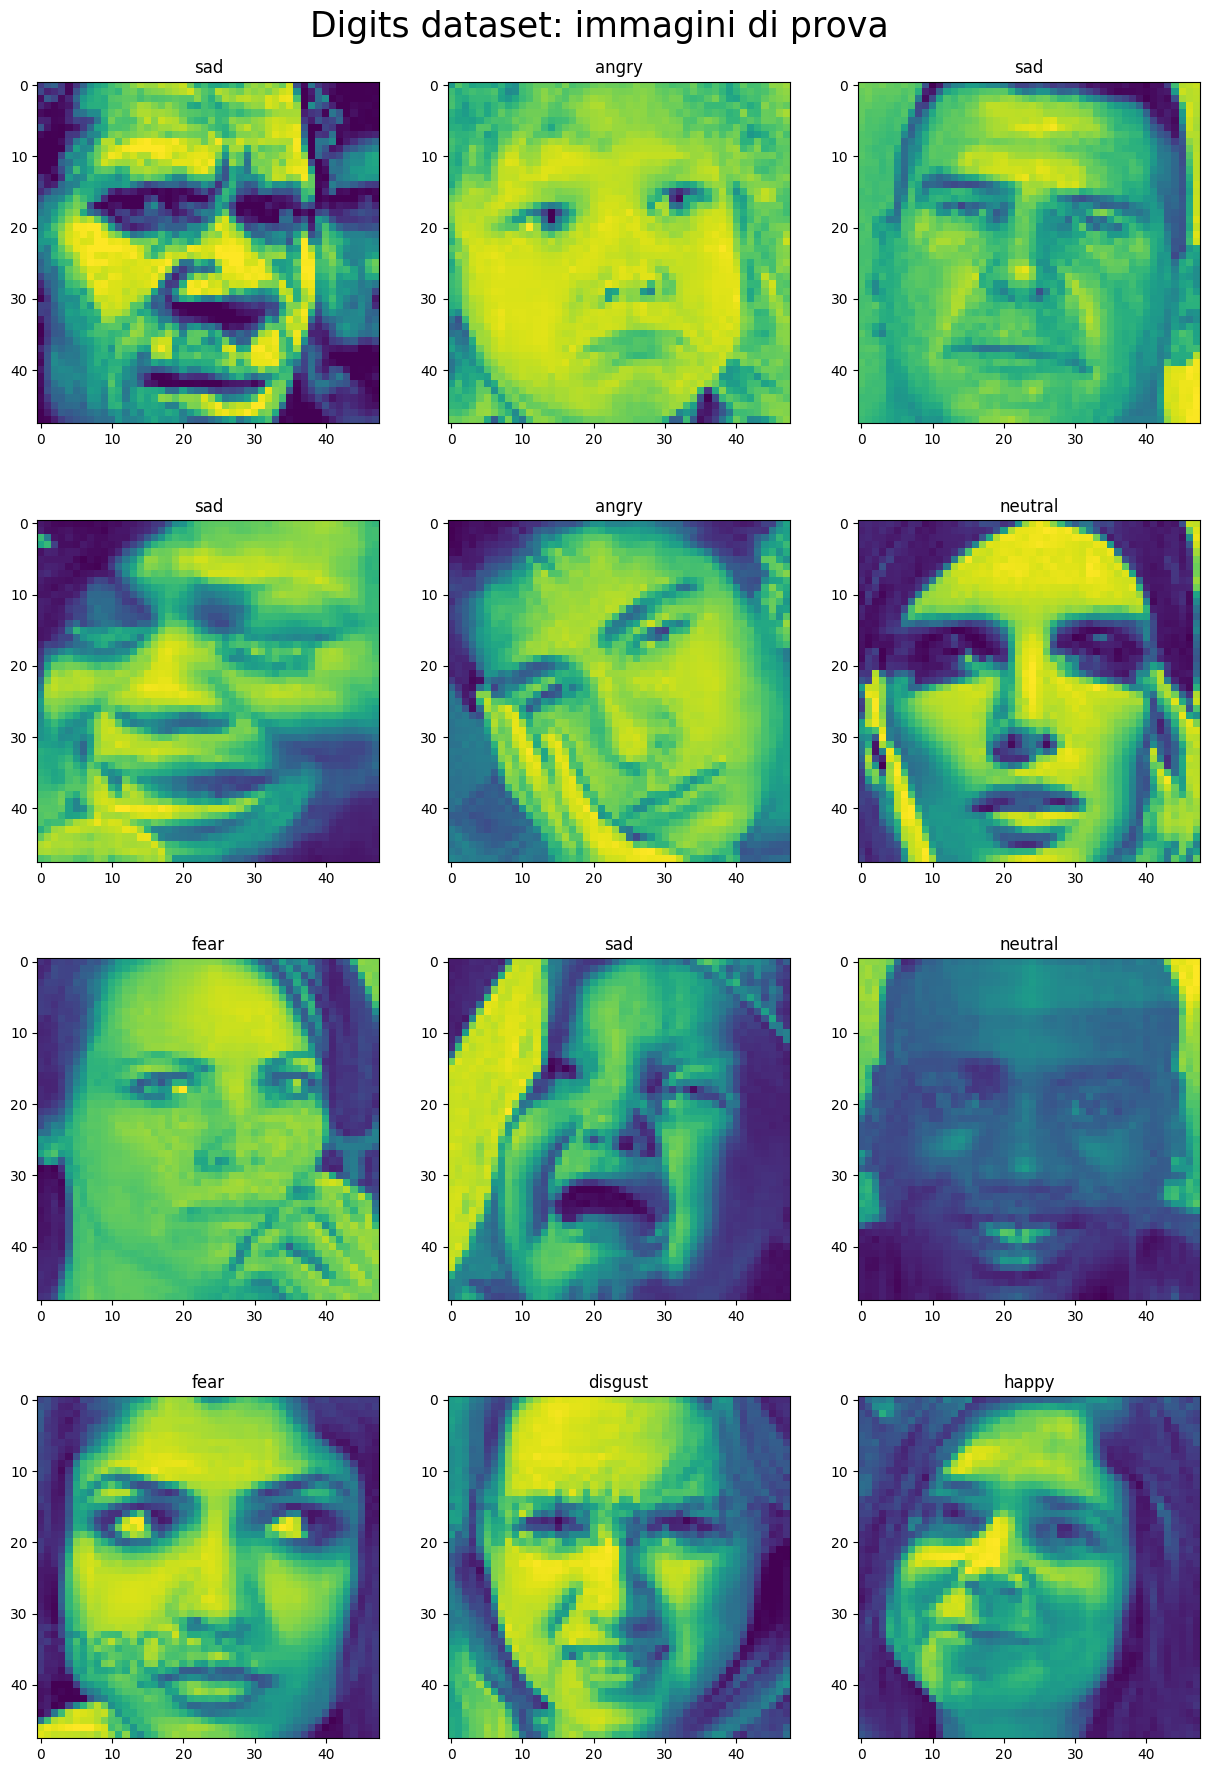

2025-09-07 12:53:27.734437: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# Funzione per visualizzare alcuni elementi appartenenti al dataset
def studyDat(img, lab, classes):
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(img[5*i+j]/255.)
            ax[i][j].set_title(classes[np.argmax(lab[5*i+j])])

    fig.suptitle("Digits dataset: immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for img, lab in trDat.take(1):
    studyDat(img, lab, cls)

## Class imbalance

In [7]:
# Valuto le classi presenti
labTr = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in trDat])
classes = np.unique(labTr)

# Calcolo dei pesi e creazione dizionario necessario per keras
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=labTr)
class_weights = dict(zip(classes, class_weights))
print(class_weights)

2025-09-07 12:59:19.620003: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


{np.int64(0): np.float64(1.0266046844269623), np.int64(1): np.float64(9.406618610747051), np.int64(2): np.float64(1.0010460615781582), np.int64(3): np.float64(0.5684387684387684), np.int64(4): np.float64(0.8260394187886635), np.int64(5): np.float64(0.8491274770777877), np.int64(6): np.float64(1.293372978330405)}


In [12]:
# Valuto le classi presenti
labTr = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in trDat])
labTe = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in teDat])

2025-09-08 11:17:36.186048: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
numTr = []
numTe = []
for i in range(0, 7):
    numTr.append(np.sum(labTr == i))
    numTe.append(np.sum(labTe == i))

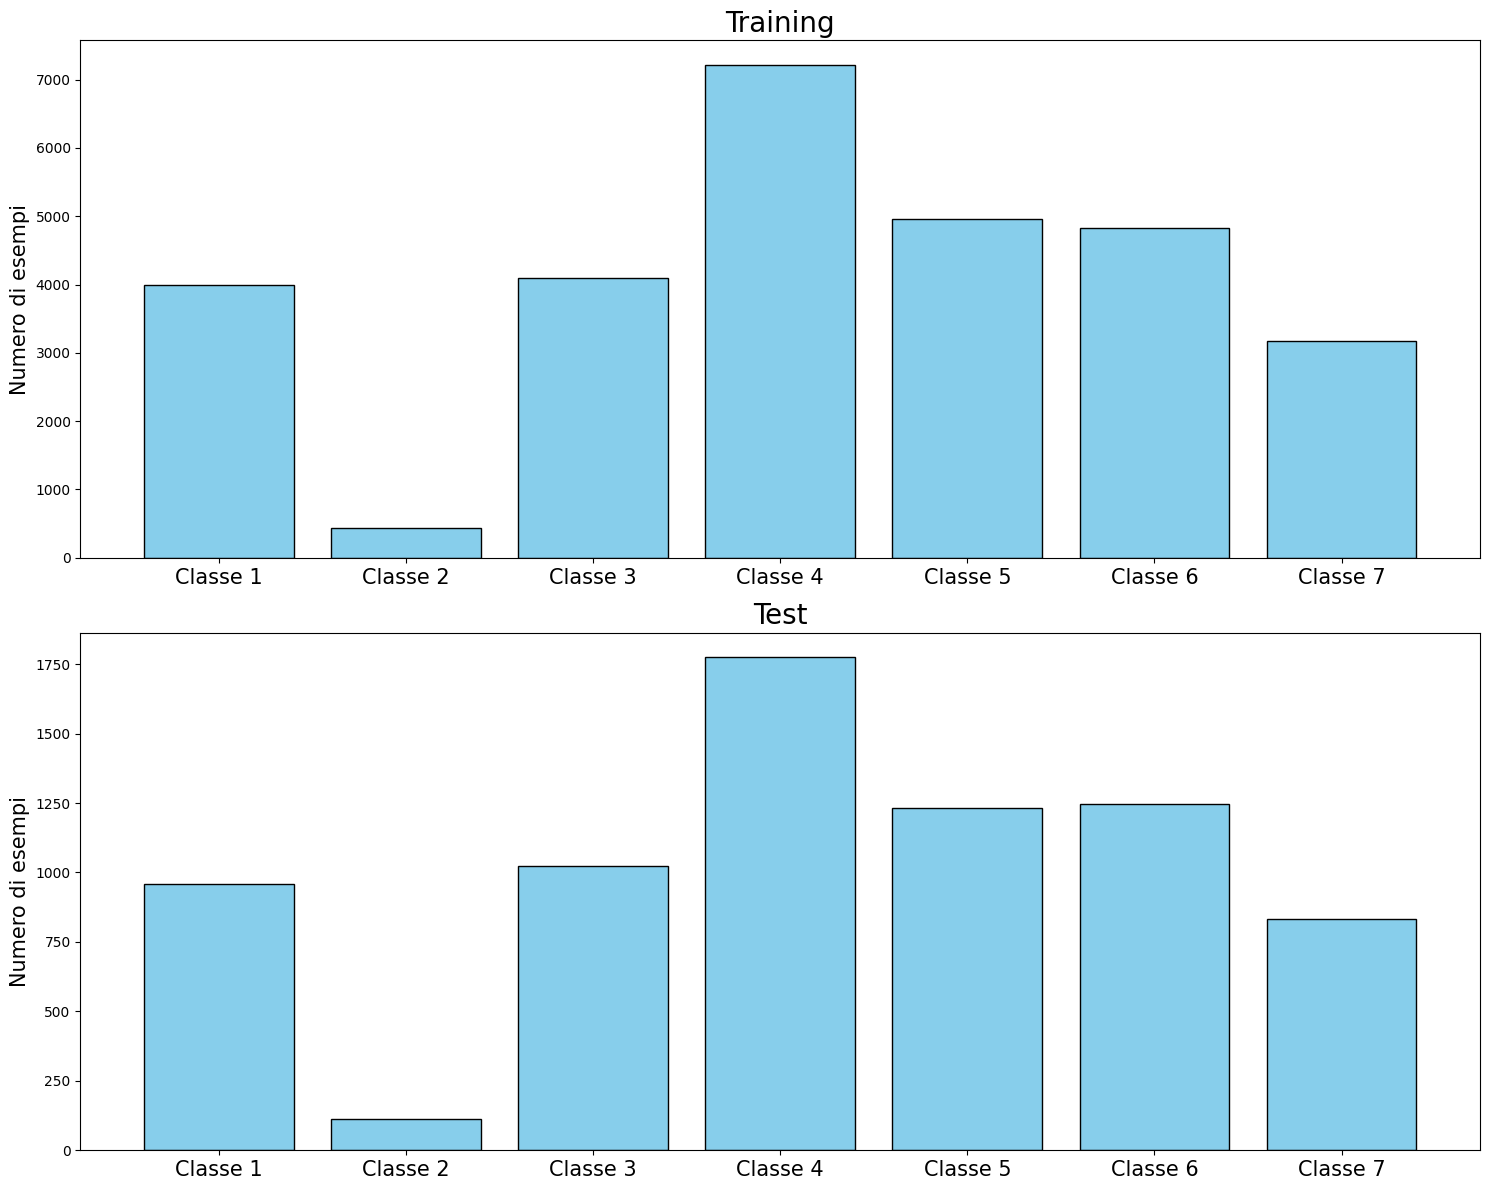

In [16]:
# Creo figura e poi riempio ciclando
fig, ax = plt.subplots(2, 1, figsize=(15, 12))  

ax[0].bar(range(len(numTr)), numTr, color='skyblue', edgecolor='black')
ax[0].set_xticks(range(len(numTr)), [f'Classe {i+1}' for i in range(len(numTr))], fontsize = 15)
ax[0].set_ylabel("Numero di esempi", fontsize = 15)
ax[0].set_title("Training", fontsize = 20)

ax[1].bar(range(len(numTe)), numTe, color='skyblue', edgecolor='black')
ax[1].set_xticks(range(len(numTe)), [f'Classe {i+1}' for i in range(len(numTe))], fontsize = 15)
ax[1].set_ylabel("Numero di esempi", fontsize = 15)
ax[1].set_title("Test", fontsize = 20)

plt.tight_layout()
plt.show()

## Singolo esempio

## Esempio per classe